In [7]:
import os
import numpy as np
from typing import Iterable, Tuple, Optional
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette="hls")

# Import HMM libraries
from hidden import dynamics
from hidden import infer

# here we assume the dynamics are symmetric
a = 0.3
b = 0.1
A = np.array([[1 - a, a], [a, 1 - a]]) # eta symmetric matrix and parameter ekta 
B = np.array([[1 - b, b], [b, 1 - b]])

hmm = dynamics.HMM(2, 2)

In [8]:
#eta diye data automatic save kora jae.
import os
from pathlib import Path
proj_dir= Path().resolve().parents[1]
#proj_dir= Path().resolve().parents[] first e eta diye dekhbo amra koi asi, ekhane amar data ta hmm er under e . first path 

#theke amar hmm path porjonto koto tuku 0,1,ebhabe jabo. .parents[] ei bracket e sei no.ta likhbo. 

data_dir=proj_dir/"data"# ekhane amar data proj_dir er undere datar modhee ase . path ta dite hobe
files= os.listdir(data_dir)

import pandas as pd
datasets=[]
for file_name in files:
  datasets.append(pd.read_csv(data_dir/file_name))
  #tahole ami data gulo dekhte parbo
  

In [12]:
# Initialize the Dynamics and Observation matrices
hmm.initialize_dynamics(A, B)

# Now run the dynamics for 1000 steps
hmm.run_dynamics(1000)
# And pull off the state and observation data
state_ts = hmm.get_state_ts()



In [13]:
# We can calculate the likelihood here, using the bayesian predictions
def calc_likelihood(
    B: np.ndarray,
    bayes_pred: Iterable[np.ndarray],
    obs_ts: Iterable[int]
) -> float:
    likelihood = 0
    for bayes, obs in zip(bayes_pred, obs_ts):
        inner =  bayes @ B[:, obs]
        likelihood -= np.log(inner)
    return likelihood

In [14]:
# Now, we need a way of generating a Bayes estimate for a specific value of the transition parameter
est = infer.MarkovInfer(2, 2)

# For a stating point, lets assume that we try a = 0.4
a_test = 0.4
A_sample = np.array([[1 - a_test, a_test], [a_test, 1 - a_test]])

# We can then generate the Bayesian filter for these dynamics
est.forward_algo(datasets[1], A_sample, B)

(-0.05, 1.05)

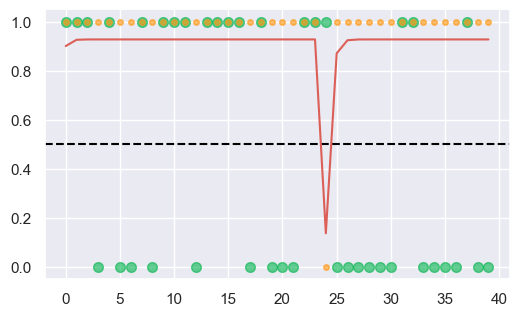

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.5))
ax.axhline(0.5, color='k', linestyle='--')
# Calcalte the probability of begin in state 1 from the forward tracker
p1_fwd = [p[1] for p in est.forward_tracker]
ax.plot(p1_fwd[:40])
ax.plot(state_ts[:40], 'o', color=sns.xkcd_rgb["shamrock"], markersize=7, alpha=0.6)
ax.plot(datasets[1][:40], 'o',color=sns.xkcd_rgb["tangerine"], markersize=4, alpha=0.6)

ax.set_ylim([-0.05,1.05])


In [17]:
# Now we can calculate the likelihood of this parameter

calc_likelihood(B, est.prediction_tracker, datasets[1])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
result_global_3.A, result_global_3.B,result_global_5.A, result_global_5.B,result_global_7.A, result_global_7.B,result_global_9.A, result_global_9.B,result_global_11.A, result_global_11.B,result_global_13.A, result_global_13.B